# Multiscale_Data_Mining_HW02_Lec04_LinearRegression

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt

##
<br/>
 1. Build a linear regression model with all input variables and measure the training and test set performance. 
 Build another linear regression model without "Dummy" variables, and also measure the training and test set performance. 
 What you can observe? Explain. Also explain how you encode the categorial input variables.<br/>
##

In [40]:
df = pd.read_csv('carseat.csv')

In [ ]:
########################################################
##  with dummies ##
#######################################################

In [384]:
x = df[['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US','Dummy01','Dummy02','Dummy03','Dummy04','Dummy05','Dummy06']]

In [165]:
y = df[["Sales"]]

In [167]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [168]:
def prepare_inputs(x_train, x_test):
    oe = OrdinalEncoder()
    oe.fit(x_train)
    x_train_enc = oe.fit_transform(x_train)
    x_test_enc = oe.fit_transform(x_test)
    return x_train_enc, x_test_enc

In [169]:
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.fit_transform(y_train)
    y_test_enc = le.fit_transform(y_test)
    return y_train_enc, y_test_enc

In [170]:
x = x.apply(pd.to_numeric, errors='coerce') #ShelveLoc column str->numeric

In [171]:
x.fillna(0, inplace=True)

In [172]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7, test_size=0.3)

In [173]:
# prepare input data
x_train_enc, x_test_enc = prepare_inputs(x_train, x_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

C:\Users\poohl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [14]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [18]:
y_predict = mlr.predict(x_test)

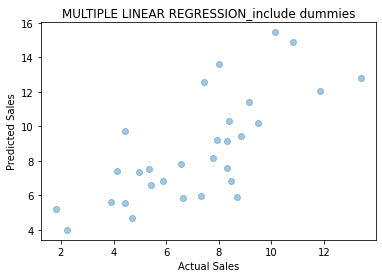

In [20]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("MULTIPLE LINEAR REGRESSION_include dummies")
plt.show()

In [ ]:
########################################################
##  without dummies ##
#######################################################

In [23]:
x2 = df[['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']]

In [24]:
y2 = df[["Sales"]]

In [25]:
x2 = x2.apply(pd.to_numeric, errors='coerce') #ShelveLoc column str->numeric

In [26]:
x2.fillna(0, inplace=True)

In [27]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,train_size=0.7, test_size=0.3)

In [28]:
# prepare input data
x2_train_enc, x2_test_enc = prepare_inputs(x2_train, x2_test)
# prepare output data
y2_train_enc, y2_test_enc = prepare_targets(y2_train, y2_test)

C:\Users\poohl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [30]:
mlr = LinearRegression()
mlr.fit(x2_train, y2_train)

LinearRegression()

In [31]:
y2_predict = mlr.predict(x2_test)

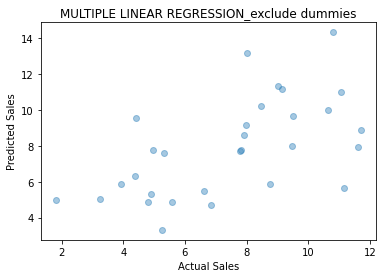

In [244]:
plt.scatter(y2_test, y2_predict, alpha=0.4)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("MULTIPLE LINEAR REGRESSION_exclude dummies")
plt.show()

##<br/>
2. Statsmodel
Using StatsModels library (or other similar library), please obtain the statistic analysis table 
such as one on page 25 of Lecture Note 4. 
In this case, please use the linear regression model with all input variables. 
Please explain the result of p-values for input variables.<br/>
##

In [42]:
import statsmodels.api as sm
from pandas import DataFrame

In [1]:
data = read_csv('carseat.csv')

NameError: name 'read_csv' is not defined

In [68]:
#df['ShelveLoc'] = pd.to_numeric(df['ShelveLoc'],errors='coerce')
#df['Urban'] = pd.to_numeric(df['Urban'],errors='coerce')
#df['US'] = pd.to_numeric(df['US'],errors='coerce')

In [71]:
df = DataFrame(data,columns=["Sales",'CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US','Dummy01','Dummy02','Dummy03','Dummy04','Dummy05','Dummy06']) 


In [242]:
x = df[['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US','Dummy01','Dummy02','Dummy03','Dummy04','Dummy05','Dummy06']]
y = df[["Sales"]]

In [386]:
x = x.apply(pd.to_numeric, errors='coerce') #ShelveLoc column str->numeric

In [387]:
x.fillna(0, inplace=True)

In [75]:
regr = LinearRegression()
regr.fit(x, y)

LinearRegression()

In [76]:
x = sm.add_constant(x) # adding a constant

In [77]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 


In [78]:
#P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     10.53
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           6.03e-13
Time:                        22:34:01   Log-Likelihood:                -207.05
No. Observations:                 100   AIC:                             442.1
Df Residuals:                      86   BIC:                             478.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.8476      2.936      1.311      

##<br/>
 3. Can you improve the test performance by including non-linear high-order or interaction terms? 
 You don't have to use all input variables in this case.<br/>
##

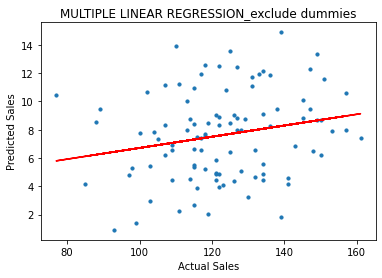

In [274]:
## original _ linear regression
df = pd.read_csv('carseat.csv')
x = df[['CompPrice']]
y = df[["Sales"]]
mlr = LinearRegression()
mlr.fit(x,y)

y_predict = mlr.predict(x)

plt.scatter(x,y, s=10)
plt.plot(x,y_predict,color='r')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("MULTIPLE LINEAR REGRESSION_exclude dummies")
plt.show()

In [627]:
rmse = np.sqrt(mean_squared_error(y,y_predict))
r2 = r2_score(y,y_predict)
print(rmse)
print(r2)

3.236338067091592
-0.09774236560194471


In [137]:
## improve model __ polynomial features
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

In [617]:
#x = df[['CompPrice','Income','Advertising','Population','Price','Age','Education']]
x = df[['Price']]#,'Income','Advertising','Population','Price','Age','Education']]
y = df[["Sales"]]

In [618]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

In [619]:
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

In [620]:
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

2.8821653134962553
0.12937639760350683


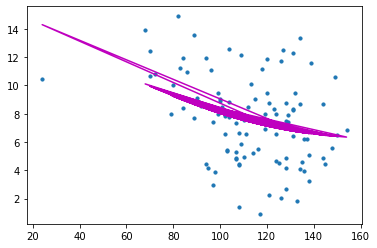

In [626]:

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
plt.plot(x, y_poly_pred, color='m')
plt.show()